In [992]:
node_number = 100
spaceMin = 0
spaceMax = 20

def illegal_position_generator(spaceMax, spaceMin):
    from itertools import permutations
    boundary = spaceMax + 2
    lower_boundary = spaceMin - 1
    items = range(lower_boundary, boundary)
    moves = {}
    i = 0
    for p in permutations(items, 2):
        moves[i] = p
        i += 1

    illegal_moves = {}
    legal_moves = {}
    for key,value in moves.items():
        for n,i in enumerate(value):
            try:        
                if i <= spaceMin or i >= spaceMax:
                    illegal_moves[key] = value
            except:
                continue
                
    for key, value in illegal_moves.iteritems():
        if value in moves.values():
            del moves[key]

    #This changes values into keys and vice versa
    moves = {y:x for x,y in moves.iteritems()}
    illegal_moves = {y:x for x,y in illegal_moves.iteritems()}
   
    # include positions at edges
    illegal_moves.update({(spaceMin,spaceMin):10000000, (spaceMax, spaceMax):100000001 })
    
    return moves, illegal_moves

# run function 
legal_moves, illegal_moves = illegal_position_generator(spaceMax, spaceMin)

def layout_gen(node_number, legal_moves): 
    import random
    
    wanted_keys = random.sample(legal_moves.keys(), node_number)
    #using dictionary comprehension to subset a dictionary by keys
    layout_old = dict((k, legal_moves[k]) for k in wanted_keys if k in legal_moves)
    
   # #I am going to omit making this dict because I can keep tract of names using the values of layout_old as a name attribute in a graph
   # #layout_names = {y:x for x,y in layout_old.iteritems()}
    
    return layout_old#, layout_names

#layout_old, node_names = layout_gen(node_number, legal_moves)
layout_old = layout_gen(node_number, legal_moves)


# This function creates illegal boundaries to follow

In [993]:
spaceMax = 300
spaceMin = 0

def illegal_boundaries(spaceMax):
    mydict = {}
    j = 1
    for i in range(spaceMax):
        mydict[ (0, i) ] = j
        j += 1
        mydict[ (i, 0) ] = j
        j += 1
        mydict[ (i+1, 0)] =j
        j += 1
        mydict[ (i, 0)] =j
        j += 1
        mydict[ (-1, i+1) ] = j
        j += 1
        mydict[ (-1, i) ] = j
        j += 1

    mydict[ (spaceMax-1, spaceMax-1) ] = 0
    
    
    return mydict

illegal_moves = illegal_boundaries(spaceMax)


In [994]:
print illegal_moves
print len(illegal_moves)

#layout_old = {(4, 5): 65, (3, 7): 55, (9, 5): 126, (8, 4): 113}
print layout_old

{(0, 86): 517, (-1, 225): 1356, (0, 175): 1051, (90, 0): 544, (177, 0): 1066, (-1, 66): 402, (0, 76): 457, (-1, 203): 1224, (0, 197): 1183, (229, 0): 1378, (-1, 36): 222, (0, 98): 589, (-1, 173): 1044, (9, 0): 58, (0, 271): 1627, (-1, 14): 90, (-1, 183): 1104, (61, 0): 370, (148, 0): 892, (0, 17): 103, (0, 293): 1759, (-1, 16): 102, (97, 0): 586, (184, 0): 1108, (287, 0): 1726, (0, 55): 331, (-1, 262): 1578, (0, 128): 769, (236, 0): 1420, (-1, 99): 600, (0, 45): 271, (-1, 232): 1398, (0, 166): 997, (0, 189): 1135, (16, 0): 100, (-1, 69): 420, (0, 67): 403, (-1, 242): 1458, (68, 0): 412, (155, 0): 934, (-1, 47): 288, (167, 0): 1006, (0, 121): 727, (-1, 212): 1278, (104, 0): 628, (207, 0): 1246, (0, 242): 1453, (0, 262): 1573, (-1, 49): 300, (0, 183): 1099, (-1, 190): 1146, (243, 0): 1462, (0, 232): 1393, (-1, 295): 1776, (-1, 27): 168, (39, 0): 238, (-1, 128): 774, (-1, 236): 1422, (0, 14): 85, (-1, 265): 1596, (0, 135): 811, (75, 0): 454, (162, 0): 976, (-1, 106): 642, (0, 36): 217, (-

# This movement function now should check boundaries too…

In [977]:
import random
from operator import add

position_selected = random.choice( layout_old.keys() )

def Mover(position_selected, layout_old, illegal_moves):
    possibilities = {1: (1, 0), 2: (0,1), 3:(-1, 0), 4:(0,-1), 5:(0,0)}
    movement_options = 4
    
    newDir = random.choice(possibilities.values())
    new_posit = tuple(map(add, position_selected, newDir))
    
    new_position_selected = boundary_checker(position_selected, spaceMin, spaceMax)
    
    if new_position_selected == position_selected:
    
        if new_posit not in layout_old.keys():        
            idx = layout_old.get(position_selected)

            del layout_old[position_selected]
            layout_old[new_posit] = idx

            return layout_old, new_posit
        else:
            return layout_old, position_selected
    else:
        if new_position_selected not in layout_old.keys():        
            idx = layout_old.get(position_selected)

            del layout_old[position_selected]
            layout_old[new_position_selected] = idx

            return layout_old, new_position_selected
        else:
            return layout_old, position_selected
    
    

print layout_old
x,y = Mover(position_selected, layout_old, illegal_moves)
print x
print y

{(6, 9): 163, (12, 1): 288, (16, 9): 384, (19, 4): 445, (1, 6): 50, (2, 5): 71, (5, 8): 140, (6, 7): 161, (10, 7): 250, (6, 10): 164, (19, 14): 455, (12, 17): 303, (19, 3): 444, (3, 2): 91, (4, 16): 126, (7, 5): 182, (12, 11): 298, (15, 14): 367, (13, 10): 319, (2, 17): 83, (14, 18): 348, (10, 14): 256, (8, 18): 216, (6, 13): 167, (9, 19): 239, (7, 8): 184, (6, 16): 170, (11, 16): 280, (2, 1): 68, (8, 9): 207, (7, 2): 179, (1, 18): 62, (19, 18): 459, (7, 15): 191, (12, 13): 299, (1, 16): 60, (17, 11): 408, (8, 6): 205, (9, 7): 228, (11, 4): 269, (16, 4): 379, (6, 11): 165, (10, 19): 261, (17, 1): 398, (12, 18): 304, (1, 19): 63, (13, 19): 327, (9, 13): 233, (4, 6): 116, (5, 7): 139, (16, 1): 376, (18, 6): 425, (19, 12): 453, (15, 9): 362, (3, 15): 103, (1, 3): 47, (2, 8): 74, (11, 14): 278, (14, 9): 340, (18, 1): 420, (13, 12): 321, (8, 10): 208, (3, 16): 104, (6, 15): 169, (11, 13): 277, (16, 11): 386, (18, 2): 421, (18, 17): 436, (3, 9): 97, (4, 2): 113, (9, 6): 227, (6, 5): 160, (5,

# Movement value function looks good and returns the movement options well!

In [861]:
from operator import add

position_selected = (8, 5)
spaceMin = 0
spaceMax = 9

def movement_finder(position_selected, illegal_moves, layout_old, spaceMin, spaceMax):
    total_moves = 4
    my_possibilities = {1: (1, 0), 2: (0,1), 3:(-1, 0), 4:(0,-1) }

    finding_neighbors = {}
    j = 0
    for i in my_possibilities.values():
        finding_neighbors[tuple(map(add, position_selected, i))] = j
        j += 1

   
    if position_selected[0] == spaceMin and position_selected[1] == spaceMin:
        current_moves = 2
        sd1 = set(finding_neighbors.keys())
        sd2 = set(layout_old.keys())
        current_moves = current_moves - len(sd1.intersection(sd2))
        return current_moves
    if position_selected[0] == spaceMax and position_selected[1] == spaceMax:
        current_moves = 2
        sd1 = set(finding_neighbors.keys())
        sd2 = set(layout_old.keys())
        current_moves = current_moves - len(sd1.intersection(sd2))
        return current_moves 
    if position_selected[0] == spaceMin or position_selected[1] == spaceMin:
        current_moves = 3
        sd1 = set(finding_neighbors.keys())
        sd2 = set(layout_old.keys())
        current_moves = current_moves - len(sd1.intersection(sd2))
        return current_moves
    if position_selected[0] == spaceMax or position_selected[1] == spaceMax:
        current_moves = 3
        sd1 = set(finding_neighbors.keys())
        sd2 = set(layout_old.keys())
        current_moves = current_moves - len(sd1.intersection(sd2))
        return current_moves
    else:
        sd1 = set(finding_neighbors.keys())
        sd2 = set(layout_old.keys())
        #sd3 = set(illegal_moves.keys())
        current_moves = total_moves - len(sd1.intersection(sd2)) #- len(sd1.intersection(sd3))
        return current_moves
    
movement_finder(position_selected, illegal_moves, layout_old, spaceMin, spaceMax)

4

In [544]:
sum(move_count.values())

211

In [589]:
def allRxn(move, bind, dissociate):

    options = numpy.zeros((3, 1))
    options[0] = move/(move + bind + dissociate)
    options[1] = (bind + move)/(move + bind + dissociate)
    options[2] = (bind + move + dissociate)/(move + bind + dissociate)
    
    random_value = random.uniform(0, 1)
    
    if 0 <= random_value <= options[0]:
        return 'move'
    elif options[0] <= random_value <= options[1]:
        return 'bind'
    else:
        return 'dissociate'

# Association Function

In [107]:
def boundary_checker(x, spaceMin, spaceMax):
    if spaceMax in x or spaceMin in x:
        x = list(x)
        if x[0] == spaceMin:
            x[0] = spaceMin + 1
        elif x[0] == spaceMax:
            x[0] = spaceMax - 1
        elif x[1] == spaceMin:
            x[1] = spaceMin + 1
        elif x[1] == spaceMax:
            x[1] = spaceMax - 1
    return tuple(x)

In [156]:
x = (10, 8)
y = boundary_checker(x, spaceMin, spaceMax)

(9, 8)

In [188]:
#5 nodes
import cProfile

cProfile.run('layout_old, pos = Mover(position_selected, layout_old, illegal_moves)')



         10 function calls in 0.000 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 <ipython-input-160-63567de2d633>:6(Mover)
        1    0.000    0.000    0.000    0.000 <ipython-input-183-d364d17ad5da>:1(boundary_checker)
        1    0.000    0.000    0.000    0.000 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 random.py:273(choice)
        1    0.000    0.000    0.000    0.000 {len}
        1    0.000    0.000    0.000    0.000 {map}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
        1    0.000    0.000    0.000    0.000 {method 'keys' of 'dict' objects}
        1    0.000    0.000    0.000    0.000 {method 'random' of '_random.Random' objects}
        1    0.000    0.000    0.000    0.000 {method 'values' of 'dict' objects}




In [196]:
# 50 nodes
import cProfile


cProfile.run('layout_old, pos = Mover(position_selected, layout_old, illegal_moves)')




         10 function calls in 0.000 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 <ipython-input-160-63567de2d633>:6(Mover)
        1    0.000    0.000    0.000    0.000 <ipython-input-183-d364d17ad5da>:1(boundary_checker)
        1    0.000    0.000    0.000    0.000 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 random.py:273(choice)
        1    0.000    0.000    0.000    0.000 {len}
        1    0.000    0.000    0.000    0.000 {map}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
        1    0.000    0.000    0.000    0.000 {method 'keys' of 'dict' objects}
        1    0.000    0.000    0.000    0.000 {method 'random' of '_random.Random' objects}
        1    0.000    0.000    0.000    0.000 {method 'values' of 'dict' objects}




In [201]:
# 5000 nodes

import cProfile

cProfile.run('layout_old, pos = Mover(position_selected, layout_old, illegal_moves)')

         11 function calls in 0.001 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.001    0.001    0.001    0.001 <ipython-input-160-63567de2d633>:6(Mover)
        1    0.000    0.000    0.000    0.000 <ipython-input-183-d364d17ad5da>:1(boundary_checker)
        1    0.000    0.000    0.001    0.001 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 random.py:273(choice)
        1    0.000    0.000    0.000    0.000 {len}
        1    0.000    0.000    0.000    0.000 {map}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
        1    0.000    0.000    0.000    0.000 {method 'get' of 'dict' objects}
        1    0.000    0.000    0.000    0.000 {method 'keys' of 'dict' objects}
        1    0.000    0.000    0.000    0.000 {method 'random' of '_random.Random' objects}
        1    0.000    0.000    0.000    0.000 {method 'values' of 'dict' objects}

In [50]:
# 50,000 nodes

import cProfile

cProfile.run('layout_old, pos = Mover(position_selected, layout_old, illegal_moves)')

         10 function calls in 0.096 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.001    0.001    0.001    0.001 <ipython-input-10-d364d17ad5da>:1(boundary_checker)
        1    0.015    0.015    0.093    0.093 <ipython-input-8-63567de2d633>:6(Mover)
        1    0.003    0.003    0.096    0.096 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 random.py:273(choice)
        1    0.000    0.000    0.000    0.000 {len}
        1    0.000    0.000    0.000    0.000 {map}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
        1    0.076    0.076    0.076    0.076 {method 'keys' of 'dict' objects}
        1    0.000    0.000    0.000    0.000 {method 'random' of '_random.Random' objects}
        1    0.000    0.000    0.000    0.000 {method 'values' of 'dict' objects}




## speed with NTI's suggestion of dict lookup

In [777]:
# 50,000 nodes

import cProfile

cProfile.run('layout_old, pos = Mover(position_selected, layout_old, illegal_moves)')

         9 function calls in 0.000 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 <ipython-input-107-d364d17ad5da>:1(boundary_checker)
        1    0.000    0.000    0.000    0.000 <ipython-input-756-09b6309fbc7c>:6(Mover)
        1    0.000    0.000    0.000    0.000 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 random.py:273(choice)
        1    0.000    0.000    0.000    0.000 {len}
        1    0.000    0.000    0.000    0.000 {map}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
        1    0.000    0.000    0.000    0.000 {method 'random' of '_random.Random' objects}
        1    0.000    0.000    0.000    0.000 {method 'values' of 'dict' objects}




In [45]:
profiling_output = numpy.array([[0, 0,0.001,0.009]])
print profiling_output

[[ 0.     0.     0.001  0.009]]


In [104]:
x = numpy.array([0, 0,0.001,0.009])
y = numpy.array([5, 50, 5000,50000])

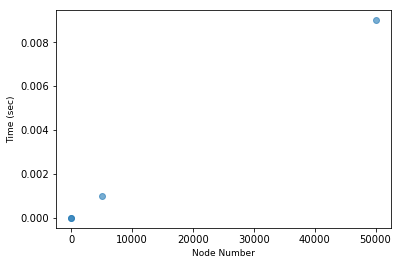

In [105]:
import matplotlib.pyplot as plt
#import numpy as np
%matplotlib inline


#plt.hist(newArray, bins=5, width=0.035, alpha=0.7, color='black')
#plt.suptitle('500T, 50N, 100S', fontsize=9)


plt.plot(y,x, "o", alpha=0.6)
plt.xlabel('Node Number',  fontsize=9)
plt.ylabel('Time (sec)',  fontsize=9)

In [65]:
from line_profiler import LineProfiler
import random

lp = LineProfiler()
lp_wrapper = lp(Mover)
lp_wrapper(position_selected, layout_old, illegal_moves)
lp.print_stats()

Timer unit: 1e-06 s

Total time: 0.008472 s
File: <ipython-input-8-63567de2d633>
Function: Mover at line 6

Line #      Hits         Time  Per Hit   % Time  Line Contents
     6                                           def Mover(position_selected, layout_old, illegal_moves):
     7         1          2.0      2.0      0.0      possibilities = {1: (1, 0), 2: (0,1), 3:(-1, 0), 4:(0,-1), 5:(0,0)}
     8         1          2.0      2.0      0.0      movement_options = 4
     9                                               
    10         1          9.0      9.0      0.1      newDir = random.choice(possibilities.values())
    11         1          5.0      5.0      0.1      new_posit = tuple(map(add, position_selected, newDir))
    12                                               
    13         1          5.0      5.0      0.1      new_position_selected = boundary_checker(position_selected, spaceMin, spaceMax)
    14                                               
    15         1         

# Mover function without dict.get()

In [756]:
import random
from operator import add

position_selected = random.choice( layout_old.keys() )

def Mover(position_selected, layout_old, illegal_moves):
    possibilities = {1: (1, 0), 2: (0,1), 3:(-1, 0), 4:(0,-1), 5:(0,0)}
    movement_options = 4
    
    newDir = random.choice(possibilities.values())
    new_posit = tuple(map(add, position_selected, newDir))
    
    new_position_selected = boundary_checker(position_selected, spaceMin, spaceMax)
    
    if new_position_selected == position_selected:
    
        if new_posit not in layout_old:        
            idx = layout_old[position_selected]

            del layout_old[position_selected]
            layout_old[new_posit] = idx

            return layout_old, new_posit
        else:
            return layout_old, position_selected
    else:
        if new_position_selected not in layout_old:        
            idx = layout_old.get(position_selected)

            del layout_old[position_selected]
            layout_old[new_position_selected] = idx

            return layout_old, new_position_selected
        else:
            return layout_old, position_selected
    
    

#print layout_old
#x,y = Mover(position_selected, layout_old, illegal_moves)
#print x
#print y

In [68]:
from line_profiler import LineProfiler
import random

lp = LineProfiler()
lp_wrapper = lp(Mover)
lp_wrapper(position_selected, layout_old, illegal_moves)
lp.print_stats()

Timer unit: 1e-06 s

Total time: 0.00476 s
File: <ipython-input-67-0c38caf56fb9>
Function: Mover at line 6

Line #      Hits         Time  Per Hit   % Time  Line Contents
     6                                           def Mover(position_selected, layout_old, illegal_moves):
     7         1          4.0      4.0      0.1      possibilities = {1: (1, 0), 2: (0,1), 3:(-1, 0), 4:(0,-1), 5:(0,0)}
     8         1          2.0      2.0      0.0      movement_options = 4
     9                                               
    10         1         53.0     53.0      1.1      newDir = random.choice(possibilities.values())
    11         1          9.0      9.0      0.2      new_posit = tuple(map(add, position_selected, newDir))
    12                                               
    13         1          6.0      6.0      0.1      new_position_selected = boundary_checker(position_selected, spaceMin, spaceMax)
    14                                               
    15         1         

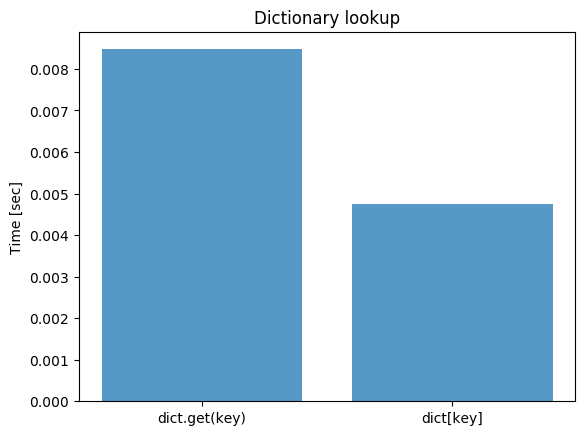

In [88]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = ('dict.get(key)', 'dict[key]')
y_pos = np.arange(len(objects))
performance = [0.008472, 0.00476]
 
plt.bar(y_pos, performance, align='center', alpha=0.75)
plt.xticks(y_pos, objects)
plt.ylabel('Time [sec]')
plt.title('Dictionary lookup')
 
plt.show()

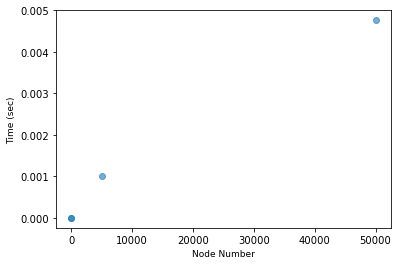

In [106]:
import matplotlib.pyplot as plt
%matplotlib inline


x = numpy.array([0, 0,0.001,0.00476])
y = numpy.array([5, 50, 5000,50000])

plt.plot(y,x, "o", alpha=0.6)
plt.xlabel('Node Number',  fontsize=9)
plt.ylabel('Time (sec)',  fontsize=9)

# Association Function

In [144]:
import random
from igraph import *
g = Graph(4)
g.vs['name'] = final_d.keys()

x=(10, 7)
#d = {(1, 1): 0, (2, 1): 1, (3, 1): 2, (10, 41):3}
d = { (3,11):0, (13,2):1, (12,3):2, (11,6):3, (13,1):4, (11,7):5, (10,7):6 }
import math

d = layout_old
new_d = {a:[c for c, b in d.items() if abs(math.hypot(*a)-math.hypot(*c)) <= 1 and c != a] for a, h in d.items()}
final_d = {a:"nan" if not b else b for a, b in new_d.items()}
    


def association_function(x, d):
    options = final_d[x]
    if options == 'nan':
        pass
    else:
        toBind = random.choice(options)
        v1_position = g.vs['name'].index( toBind )
        v2_position = g.vs['name'].index( x )
        if g.degree(v1_position) < 4 and g.degree(v2_position) < 4:
            g.add_edge(v1_position, v2_position)
    return g

In [189]:
posit = numpy.array([[1,0], [0,1], [-1, 0], [0,-1] ])
x = (10, 1)
new_posit = posit + x
d = {(11,1):0, (121,12):1, (324, 23):2, (9,2):3, (9,1):4}

# this is my new association function as of 19-12-17

In [886]:
new_list = []
new_dict = {}
posit = numpy.array([[1,0], [0,1], [-1, 0], [0,-1] ])
g = Graph(6)
x = (10, 1)
d = {(11,1):0, (121,12):1, (324, 23):2, (9,2):3, (9,1):4, (10,1):5}
g.vs['name'] = d.keys()

def new_association_function(x, d, g):
    new_list = []
    posit = numpy.array([[1,0], [0,1], [-1, 0], [0,-1] ])
    
    new_posit = posit + x
    for i in new_posit:
        b = tuple(i)
        if b in d:
            new_list.append(b)
            new_dict[x] = new_list        
        else:
            new_dict[x] = 'NaN'

    if new_dict[x] == 'NaN':
        pass
    else:
        options = new_dict[x]
        toBind = random.choice(options)
        v1_position = g.vs['name'].index( toBind )
        v2_position = g.vs['name'].index( x )
        if g.degree(v1_position) < 4 and g.degree(v2_position) < 4:
            g.add_edge(v1_position, v2_position)
    return g

In [871]:
print new_association_function((10,1), d, g)

IGRAPH UN-- 6 0 --
+ attr: name (v)


In [894]:
g = Graph(len(layout_old))
g.vs['name'] = layout_old.keys()
new_dict = {}
def new_association_function(x, d, g, new_dict, val):
    new_list = []
    posit = numpy.array([[1,0], [0,1], [-1, 0], [0,-1] ])
    
    new_posit = posit + x
    for i in new_posit:
        b = tuple(i)
        if b in d:
            new_list.append(b)
            new_dict[x] = new_list
    if x in new_dict and val == True:
        options = new_dict[x]
        toBind = random.choice(options)
        v1_position = g.vs['name'].index( toBind )
        v2_position = g.vs['name'].index( x )
        if g.degree(v1_position) < 4 and g.degree(v2_position) < 4:
            g.add_edge(v1_position, v2_position)
        return new_dict[x]
    elif x in new_dict and val == False:
        return new_dict[x]
    else:
        new_dict[x] = 'NaN'
        return new_dict[x]

    

In [895]:
new_association_function((19,1), layout_old, g, new_dict, False)

'NaN'

## This initiates the association dict & the association count

In [896]:
g = Graph(len(layout_old))
g.vs['name'] = layout_old.keys()
new_dict = {}

for k,v in layout_old.items():
    new_association_function(k, layout_old, g, new_dict, False)
    #if output[k] != 'NaN':
    #    assoc_count[k] = 4 - len(output[k])
    #else:
    #    assoc_count[k] = 4
    


In [897]:
new_dict

{(1, 3): [(2, 3), (1, 4)],
 (1, 4): [(2, 4), (1, 3)],
 (1, 6): [(2, 6)],
 (1, 8): 'NaN',
 (2, 1): 'NaN',
 (2, 3): [(2, 4), (1, 3)],
 (2, 4): [(3, 4), (2, 5), (1, 4), (2, 3)],
 (2, 5): [(2, 6), (2, 4)],
 (2, 6): [(3, 6), (2, 7), (1, 6), (2, 5)],
 (2, 7): [(3, 7), (2, 6)],
 (2, 9): [(3, 9)],
 (3, 4): [(2, 4)],
 (3, 6): [(4, 6), (3, 7), (2, 6)],
 (3, 7): [(4, 7), (3, 8), (2, 7), (3, 6)],
 (3, 8): [(3, 9), (3, 7)],
 (3, 9): [(2, 9), (3, 8)],
 (4, 1): [(5, 1)],
 (4, 3): [(5, 3)],
 (4, 5): [(4, 6)],
 (4, 6): [(5, 6), (4, 7), (3, 6), (4, 5)],
 (4, 7): [(3, 7), (4, 6)],
 (5, 1): [(5, 2), (4, 1)],
 (5, 2): [(6, 2), (5, 3), (5, 1)],
 (5, 3): [(5, 4), (4, 3), (5, 2)],
 (5, 4): [(6, 4), (5, 3)],
 (5, 6): [(4, 6)],
 (5, 8): [(6, 8), (5, 9)],
 (5, 9): [(6, 9), (5, 8)],
 (6, 2): [(7, 2), (5, 2)],
 (6, 4): [(6, 5), (5, 4)],
 (6, 5): [(7, 5), (6, 4)],
 (6, 7): [(6, 8)],
 (6, 8): [(7, 8), (6, 9), (5, 8), (6, 7)],
 (6, 9): [(7, 9), (5, 9), (6, 8)],
 (7, 1): [(7, 2)],
 (7, 2): [(7, 3), (6, 2), (7, 1)],
 (

# Gillespie

In [995]:
import random
from operator import add
import numpy 
from igraph import *


# 2D lattice
spaceMin = 0
spaceMax = 10

# Find legal and illegal moving options
illegal_moves = illegal_boundaries(spaceMax)

# Number of objects to simulate
node_number = 50

# Place objects in 2D lattice
layout_old = layout_gen(node_number, legal_moves)

# Updates illegal moves dict
#illegal_moves = merge_two_dicts(illegal_moves, layout_old)





## This initiates the movement count

In [996]:
move_count = {}

for k,v in layout_old.items():
    val = movement_finder(k, illegal_moves, layout_old, spaceMin, spaceMax)
    move_count[k] = val

In [997]:
move_count

{(1, 7): 4,
 (1, 9): 4,
 (3, 16): 4,
 (4, 1): 4,
 (4, 7): 4,
 (4, 9): 2,
 (4, 10): 2,
 (4, 19): 4,
 (5, 3): 4,
 (5, 9): 3,
 (5, 14): 4,
 (6, 2): 4,
 (6, 4): 3,
 (6, 8): 4,
 (6, 10): 3,
 (6, 12): 3,
 (6, 13): 3,
 (6, 18): 4,
 (7, 4): 3,
 (8, 2): 4,
 (8, 5): 4,
 (8, 9): 4,
 (9, 18): 4,
 (10, 15): 3,
 (11, 2): 4,
 (11, 4): 4,
 (12, 6): 4,
 (12, 15): 4,
 (12, 19): 3,
 (13, 1): 4,
 (13, 3): 4,
 (13, 8): 4,
 (13, 19): 3,
 (14, 16): 4,
 (15, 8): 3,
 (15, 12): 4,
 (16, 1): 4,
 (16, 8): 3,
 (16, 17): 4,
 (17, 6): 4,
 (17, 9): 3,
 (18, 2): 4,
 (18, 9): 3,
 (18, 12): 4,
 (19, 3): 3,
 (19, 4): 3,
 (19, 11): 4,
 (19, 14): 3,
 (19, 15): 2,
 (19, 16): 3}

## This initiates the neighbor tracking

In [998]:
import collections
g = Graph(len(layout_old))
#g.vs['name'] = layout_old.keys()

od = collections.OrderedDict(sorted(layout_old.items()))
g.vs['name'] = od.keys()

neighbor_tracking = {}

for k,v in layout_old.items():
    new_association_function(k, layout_old, g, neighbor_tracking, False)
    
    

In [999]:
neighbor_tracking


{(1, 7): 'NaN',
 (1, 9): 'NaN',
 (3, 16): 'NaN',
 (4, 1): 'NaN',
 (4, 7): 'NaN',
 (4, 9): [(5, 9), (4, 10)],
 (4, 10): [(4, 9)],
 (4, 19): 'NaN',
 (5, 3): 'NaN',
 (5, 9): [(4, 9)],
 (5, 14): 'NaN',
 (6, 2): 'NaN',
 (6, 4): [(7, 4)],
 (6, 8): 'NaN',
 (6, 10): 'NaN',
 (6, 12): [(6, 13)],
 (6, 13): [(6, 12)],
 (6, 18): 'NaN',
 (7, 4): [(6, 4)],
 (8, 2): 'NaN',
 (8, 5): 'NaN',
 (8, 9): 'NaN',
 (9, 18): 'NaN',
 (10, 15): 'NaN',
 (11, 2): 'NaN',
 (11, 4): 'NaN',
 (12, 6): 'NaN',
 (12, 15): 'NaN',
 (12, 19): [(13, 19)],
 (13, 1): 'NaN',
 (13, 3): 'NaN',
 (13, 8): 'NaN',
 (13, 19): [(12, 19)],
 (14, 16): 'NaN',
 (15, 8): [(16, 8)],
 (15, 12): 'NaN',
 (16, 1): 'NaN',
 (16, 8): [(15, 8)],
 (16, 17): 'NaN',
 (17, 6): 'NaN',
 (17, 9): [(18, 9)],
 (18, 2): 'NaN',
 (18, 9): [(17, 9)],
 (18, 12): 'NaN',
 (19, 3): [(19, 4)],
 (19, 4): [(19, 3)],
 (19, 11): 'NaN',
 (19, 14): [(19, 15)],
 (19, 15): [(19, 16), (19, 14)],
 (19, 16): [(19, 15)]}

In [1004]:
t = 0
total_time = 5000
k_move = 1e-3
k_bind = 1e-4
k_off = 1e-2
tau = 1e-3
times = []

# this sets up initial movement options
#for k,v in layout_old.items():
#    movement_positions[v] = movement_finder(k, illegal_moves, layout_old, spaceMin, spaceMax)
        
while t <= total_time:


    ## Calculate all possible reactions

    move = sum(move_count.values() )                              # movement
    move_k = move * k_move * tau

    bind = len(layout_old.keys() )*4                              # binding
    bind_k = bind * k_bind * tau

    dissociate = sum(g.vs.degree())                              # dissociation
    dissociate_k = dissociate * k_off * tau


    #rate_sum = move_k + bind_k + dissociate_k                     # Time at which the next reaction will take place
    #tau = random.expovariate(lambd=rate_sum)                      # Time at which the next reaction will take place
    #times.append(tau)                                             # Save time as a tuple
    reaction = allRxn(move_k, bind_k, dissociate_k)                # Sample from uniform distribution

    if reaction == 'move':
        position_selected = random.choice(layout_old.keys() )                  # randomly select a node
        
        move_count.pop(position_selected)
        neighbor_tracking.pop(position_selected)
       # try:
       ##     del move_count[position_selected]                                      # remove from move_count to then update later 
        #    del neighbor_tracking[position_selected]                               # remove from neighbor_tracking to then update later
        #except:
        #    print "error encountered"
        
        od = collections.OrderedDict(sorted(layout_old.items()))
        g.vs['name'] = od.keys()
        
        layout_old, pos = Mover(position_selected, layout_old, illegal_moves)  # move in new direction         


        # this will update the count of moves the selected object can perform still
        move_count[pos] = movement_finder(pos, illegal_moves, layout_old, spaceMin, spaceMax)
        new_association_function(pos, layout_old, g, neighbor_tracking, False)
        
        if pos != position_selected:
            v1_position = g.vs['name'].index( position_selected )
            if g.degree(v1_position) > 0:
                g.delete_edges(v1_position)


        od = collections.OrderedDict(sorted(layout_old.items()))
        g.vs['name'] = od.keys()    
     
       
        print 'move'
        print position_selected
        print pos
        
    if reaction == 'bind':
        
        position_selected = edge_selector(neighbor_tracking)                  # select a node with neighbors randomly for forming an edge


        #position_selected = random.choice(layout_old.keys() )                  # randomly select a node
        
        move_count.pop(position_selected)
        neighbor_tracking.pop(position_selected)
        
        #try:
        #    del move_count[position_selected]                                      # remove from move_count to then update later 
        #    del neighbor_tracking[position_selected]     q                         # remove from neighbor_tracking to then update later
        #except:
        #    print 'error in binding encountered'

        od = collections.OrderedDict(sorted(layout_old.items()))
        g.vs['name'] = od.keys()
        
        # bind & update move_count and neighbor_tracking dict
        
        new_association_function(position_selected, layout_old, g, neighbor_tracking, True)
        move_count[position_selected] = movement_finder(position_selected, illegal_moves, layout_old, spaceMin, spaceMax)
        
        od = collections.OrderedDict(sorted(layout_old.items()))
        g.vs['name'] = od.keys()
        
        g.simplify(g)                                                               # simplify the graph  
        
        print 'bind'
        print position_selected
        print g
        
    t += 1



move
(19, 15)
(19, 15)
move
(1, 9)
(0, 9)
move
(17, 6)
(17, 5)
move
(8, 2)
(8, 2)
move
(6, 8)
(6, 9)
bind
(19, 16)
IGRAPH UN-- 50 4 --
+ attr: name (v)
+ edges (vertex names):
(4, 7)--(5, 9), (6, 12)--(6, 13), (15, 8)--(16, 9), (19, 15)--(19, 16)
move
(15, 12)
(15, 13)


InternalError: Error at iterators.c:1817: Cannot create iterator, invalid edge id, Invalid vertex id

# Function finds which nodes to bind to randomly based on which are nearby others. 

In [826]:
def edge_selector(neighbor_tracking):
    checker = 'NaN'
    while checker == 'NaN':
        val = random.choice(neighbor_tracking.keys())
        checker = neighbor_tracking[val]
    return val
    

In [827]:
x = edge_selector(neighbor_tracking)

In [828]:
print x

(232, 195)


# # delete connections to other nodes if node moves

In [947]:
pos = (1,2)
position_selected = (3, 4)
if pos != position_selected:
    v1_position = g.vs['name'].index( (1,3) )
    g.delete_edges(v1_position)

yes


0

In [988]:
print g.vs['name']

[(1, 3), (1, 7), (1, 10), (1, 12), (2, 10), (2, 13), (3, 14), (4, 9), (4, 12), (4, 13), (4, 17), (5, 6), (5, 12), (6, 11), (6, 16), (7, 1), (7, 6), (7, 9), (7, 14), (8, 2), (8, 4), (8, 7), (8, 11), (9, 5), (10, 14), (11, 7), (12, 5), (12, 13), (12, 16), (12, 19), (13, 2), (13, 9), (13, 10), (14, 4), (14, 7), (15, 6), (15, 8), (15, 12), (16, 5), (16, 8), (16, 10), (16, 15), (16, 18), (17, 5), (18, 5), (18, 9), (18, 10), (18, 13), (18, 17), (19, 16)]


In [989]:
g.vs['name'].index( pos)

ValueError: (9, 7) is not in list

In [1013]:
position_selected

(15, 8)

In [1008]:
print g

IGRAPH UN-- 50 4 --
+ attr: name (v)
+ edges (vertex names):
(4, 7)--(5, 9), (6, 12)--(6, 13), (15, 8)--(16, 9), (19, 15)--(19, 16)


In [1010]:
v1_position = g.vs['name'].index(position_selected)
g.delete_edges(v1_position)


InternalError: Error at iterators.c:1817: Cannot create iterator, invalid edge id, Invalid vertex id

In [1012]:
print g.vs['name']

[(0, 9), (1, 7), (3, 16), (4, 1), (4, 3), (4, 7), (4, 9), (4, 10), (4, 19), (5, 9), (5, 15), (6, 2), (6, 4), (6, 9), (6, 12), (6, 13), (6, 18), (7, 4), (7, 9), (8, 2), (8, 5), (8, 9), (9, 15), (9, 18), (11, 4), (11, 18), (12, 2), (12, 15), (13, 0), (13, 4), (13, 5), (13, 8), (13, 19), (14, 15), (15, 1), (15, 8), (15, 13), (16, 9), (16, 17), (17, 5), (17, 8), (18, 2), (18, 9), (18, 13), (19, 3), (19, 5), (19, 11), (19, 14), (19, 15), (19, 16)]
